# Introduction

Content

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

Acknowledgements

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.

Inspiration

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

Citation

Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

### Import data and modules

In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
%matplotlib inline

In [125]:
init_notebook_mode(connected=True)
cf.go_offline()

In [126]:
path = os.path.join("Data","Admission_Predict.csv")
ga_df = pd.read_csv(path)
print("Data is imported!")

Data is imported!


### Data analysis

In [127]:
ga_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [128]:
ga_df.info()
print('\n'+'Dataframe shape is: {}'.format(ga_df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB

Dataframe shape is: (500, 9)


In [129]:
ga_df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [130]:
ga_df.drop('Serial No.',axis=1,inplace=True)

#### White space exists at the end of some column names --> stripping

In [131]:
ga_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [133]:
ga_df.columns = list(map(lambda col: col.strip(),ga_df.columns))

### EDA

In [134]:
ga_df.iplot(kind='scatter',x='GRE Score',y='Chance of Admit',mode='markers',size=10,xTitle='GRE Score',)

In [221]:
columns = ['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research']

In [229]:
likely = ga_df[ga_df['Chance of Admit']>=0.7].groupby('University Rating').agg('mean')[columns]
not_likely = ga_df[ga_df['Chance of Admit']<0.7].groupby('University Rating').agg('mean')[columns]

In [237]:
GRE_compare = pd.concat([likely['GRE Score'],not_likely['GRE Score']],axis=1)
GRE_compare.columns=['likely','not_likely']
TOEFL_compare = pd.concat([likely['TOEFL Score'],not_likely['TOEFL Score']],axis=1)
TOEFL_compare.columns=['likely','not_likely']

In [231]:
GRE_compare.iplot(kind='bar')

In [238]:
TOEFL_compare.iplot(kind='bar')

In [236]:
likely.drop(['GRE Score','TOEFL Score'],axis=1).iplot(kind='bar')

In [248]:
ga_df['likeness'] = ga_df['Chance of Admit'].apply(lambda chance: 1 if chance>0.7 else 0)

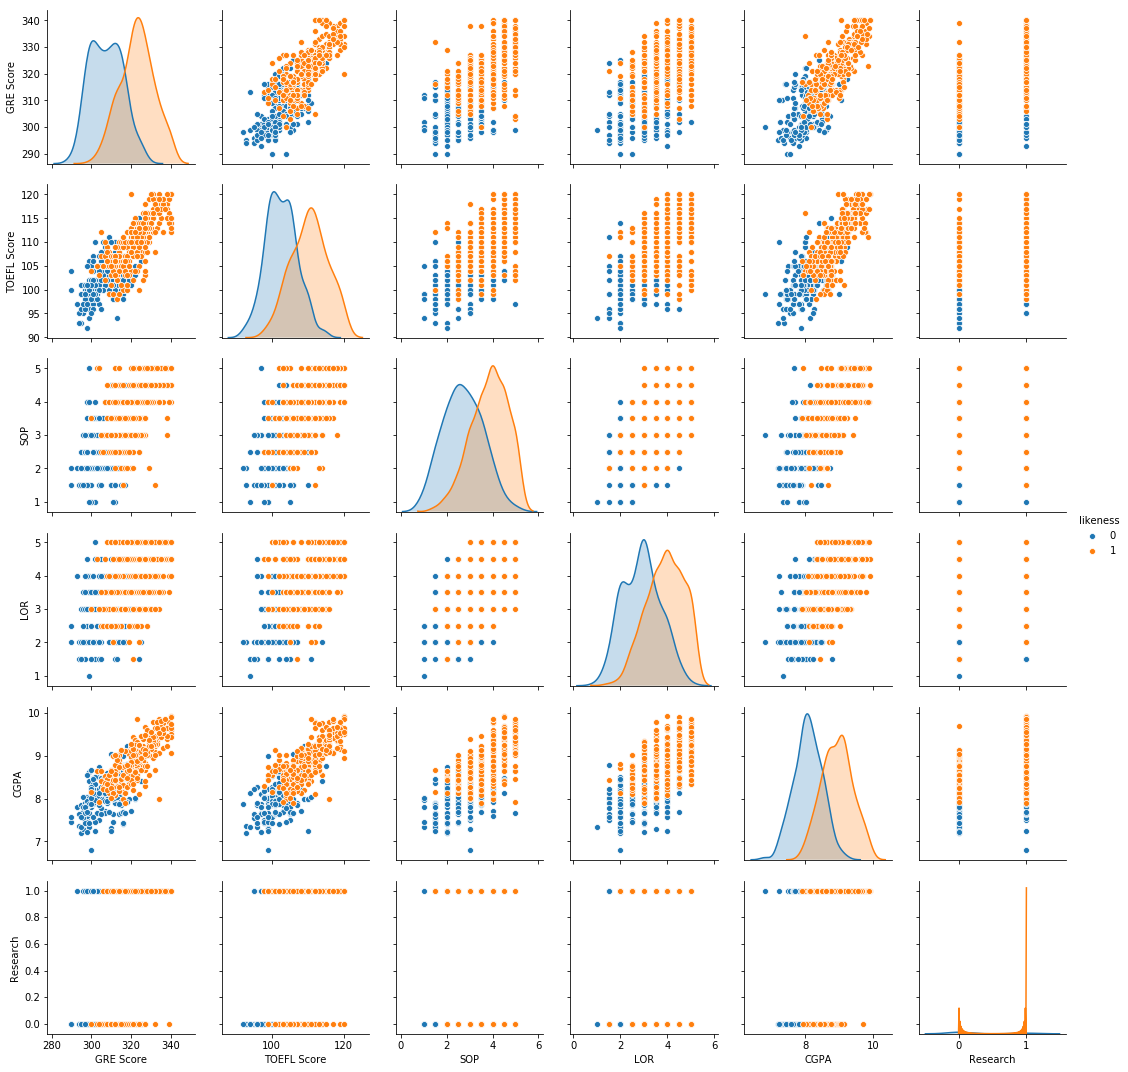

In [251]:
sns.pairplot(ga_df,vars=columns,hue='likeness')

In [254]:
#sns.distplot(ga_df['GRE Score'])

In [255]:
#ga_df['Research'].value_counts().iplot(kind='bar')

## note about the data
I created a new categorical column 'likeness'; 1 if 'chance of admit' >=70%, 0 if not. We can play with this threshold variable later.

In [3]:
#Test Train Split
from sklearn.model_selection import train_test_split